# Loading the Dataset and Preprocessing

**Loading data from Keras Dataset library**

In [92]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from keras.optimizers import SGD, Adagrad
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.constraints import max_norm
from keras.layers.core import Flatten, Dense, Activation, Dropout, Reshape
import matplotlib.pyplot as plt
%matplotlib inline  

In [80]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

from keras.utils import np_utils
# reshape the training samples
X_train = X_train[0:1000].reshape(1000,28*28) / 255
X_test = X_test[0:1000].reshape(1000,28*28) / 255
print("X_train shape:", x_train.shape)
print(X_train.shape[0], "train samples")
print(X_test.shape[0], "test samples")


# convert class vectors to binary class matrices
# one hot encode outputs
y_train = np_utils.to_categorical(y_train[0:1000])
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

X_train shape: (60000, 28, 28)
1000 train samples
1000 test samples


In [40]:
# Model configuration
img_width, img_height         = 32, 32
batch_size                    = 250
epochs                        = 55
validation_split              = 0.2
verbosity                     = 1
max_norm_value                = 2.0

In [76]:
# Reshape image vectors
augmented_x_train = x_train.reshape(-1, 28, 28, 1)
augmented_x_test = x_test.reshape(-1, 28, 28, 1)

# Create image data generator to load images in batches
data_gen = ImageDataGenerator()
data_gen.fit(augmented_x_train)
train_batches = data_gen.flow(x_train, y_train, batch_size=batch_size)
val_batches = data_gen.flow(x_test, y_test, batch_size=batch_size)

# **Training Model:**

In [74]:
# Create the model
def nn_model():
  model = Sequential()
  model.add(Reshape((-1,), input_shape = (28, 28, 1)))
  model.add(Dense(28 * 28, activation='relu'))
  model.add(Dropout(0.50))
  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.50))
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.50))
  # output layer for the 10 possible outcomes
  model.add(Dense(10, activation='softmax'))

  return(model)

In [97]:
def plot_fig(i, history):
    fig = plt.figure()
    plt.plot(range(1,epochs+1),history.history['val_accuracy'],label='validation')
    plt.plot(range(1,epochs+1),history.history['accuracy'],label='training')
    plt.legend(loc=0)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.xlim([1,epochs])
#     plt.ylim([0,1])
    plt.title("Model Accuracy")
    plt.show()

## **Model with constant learning rate:**

In [88]:
learning_rate = 0.1
model1 = nn_model()

Epoch 1/55
240/240 [==============================] - 9s 36ms/step - loss: nan - accuracy: 0.0990 - val_loss: nan - val_accuracy: 0.0980
Epoch 2/55
240/240 [==============================] - 9s 36ms/step - loss: nan - accuracy: 0.0976 - val_loss: nan - val_accuracy: 0.0980
Epoch 3/55
240/240 [==============================] - 9s 36ms/step - loss: nan - accuracy: 0.0990 - val_loss: nan - val_accuracy: 0.0980
Epoch 4/55
240/240 [==============================] - 9s 35ms/step - loss: nan - accuracy: 0.0981 - val_loss: nan - val_accuracy: 0.0980
Epoch 5/55
240/240 [==============================] - 8s 35ms/step - loss: nan - accuracy: 0.0970 - val_loss: nan - val_accuracy: 0.0980
Epoch 6/55
240/240 [==============================] - 9s 37ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980
Epoch 7/55
240/240 [==============================] - 9s 36ms/step - loss: nan - accuracy: 0.0992 - val_loss: nan - val_accuracy: 0.0980
Epoch 8/55
240/240 [=====================

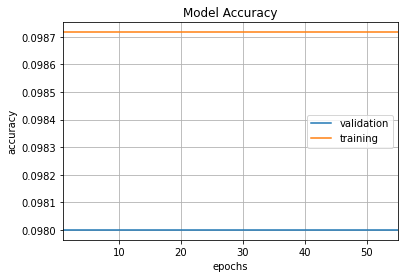

FileNotFoundError: ignored

In [96]:
# Set SGD as optimizer, categorical_crossentropy for loss, and accuracy and output metric 
model1.compile(
  optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate),
  loss='categorical_crossentropy',
  metrics=['accuracy']
)

# Train model using ImageDataGenerator along with validation step
history1 = model1.fit(
  train_batches, 
  steps_per_epoch=augmented_x_train.shape[0] // batch_size,
  epochs=epochs, 
  validation_data=val_batches, 
  validation_steps=augmented_x_test.shape[0] // batch_size
)

# plot model accuracy
plot_fig(1, history1)

# Evaluation:

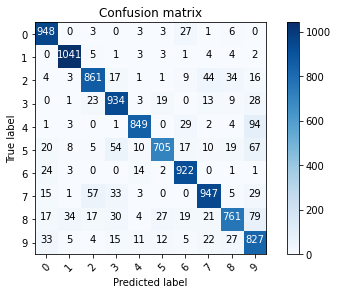

In [69]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import itertools


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(x_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

## **Using Adaptive learning rate in keras:**

Epoch 1/55
240/240 [==============================] - 10s 38ms/step - loss: 47.3476 - accuracy: 0.2625 - val_loss: 1.0773 - val_accuracy: 0.6180
Epoch 2/55
240/240 [==============================] - 9s 36ms/step - loss: 9.1781 - accuracy: 0.3587 - val_loss: 1.3352 - val_accuracy: 0.5265
Epoch 3/55
240/240 [==============================] - 9s 37ms/step - loss: 5.4979 - accuracy: 0.3502 - val_loss: 1.6069 - val_accuracy: 0.4603
Epoch 4/55
240/240 [==============================] - 9s 37ms/step - loss: 4.0449 - accuracy: 0.3368 - val_loss: 1.7697 - val_accuracy: 0.3976
Epoch 5/55
240/240 [==============================] - 9s 36ms/step - loss: 3.2715 - accuracy: 0.3232 - val_loss: 1.8433 - val_accuracy: 0.3648
Epoch 6/55
240/240 [==============================] - 9s 37ms/step - loss: 2.8628 - accuracy: 0.3144 - val_loss: 1.8387 - val_accuracy: 0.3702
Epoch 7/55
240/240 [==============================] - 9s 37ms/step - loss: 2.6296 - accuracy: 0.3124 - val_loss: 1.8333 - val_accuracy: 0.37

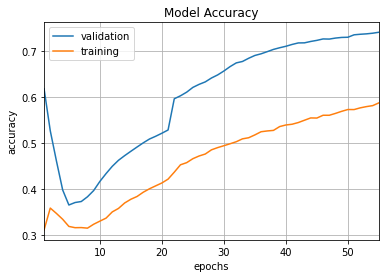

In [99]:
model2 = nn_model()

model2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adagrad(),
              metrics=['accuracy'])

# Fit the model
history2 = model2.fit(train_batches, 
                    steps_per_epoch=augmented_x_train.shape[0] // batch_size,
                    epochs=epochs, 
                    validation_data=val_batches, 
                    validation_steps=augmented_x_test.shape[0] // batch_size)

# plot model accuracy
plot_fig(2, history2)

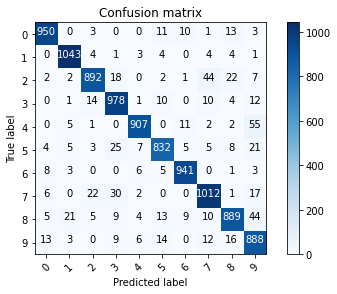

In [94]:
# Predict the values from the validation dataset
Y_pred = model.predict(x_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 